In [136]:
##도미의 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [137]:
## 데이터 나열
import numpy as np

In [138]:
##2개 리스트를 튜플로 전달
##튜플은 수정할 수 없음. 함수로 전달한 값이 바뀌지 않는다는 것을 믿을 수 있음
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [139]:
##fish_data에 각 생선 길이, 무게 데이터 합침
fish_data = np.column_stack((fish_length, fish_weight))

In [140]:
##두 리스트가 잘 연결되었는지 첫 5개 data 확인
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [141]:
#np.ones=넘파이 함수, 각각 원하는 개수의 1을 채운 배열을 만들어줌
# 1 채운 후 5개 출력
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [142]:
##두 배열을 연결, 첫번째 차원을 따라 배열을 연결하는 np.concatenate() 함수 사용
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [143]:
##데이터 출력
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [144]:
## 훈련세트, 테스트세트 나누기
##train_test_split()함수 사용
#import
from sklearn.model_selection import train_test_split

In [145]:
##훈련 세트와 테스트 세트 나눔
#train_input   → 훈련 입력 데이터 (길이/무게)
#train_target  → 훈련 정답 (도미=1, 빙어=0)

#test_input    → 시험 입력 데이터
#test_target   → 시험 정답

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [146]:
##shape는 배열(데이터)의 크기, 모양을 알려주는 속성
##(데이터, 특징) 형태로 알려줌, 총 49개 data 들어가있음!
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [147]:
##input data는 2차원 배열, target data는 1차원 배열
print(train_target.shape, test_target.shape)

(36,) (13,)


In [148]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [149]:
test_target을 출력해보면 도미3.3:빙어1 비율로 나오는데
49개 sample 중 도미와 빙어 비율은 2.5:1임
샘플링 편향이 나타난 것을 확인함

SyntaxError: invalid decimal literal (2467116232.py, line 2)

In [150]:
##train_test_split() 은 데이터를 랜덤으로 섞어서 나누는데
##이 때 stratify=y 매개변수를 넣으면 전체 데이터의 비율에 맞게 세트를 나눠줌
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [151]:
##골고루 분포된걸 확인
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [152]:
##모델 훈련
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [153]:
##이제 리스트에 없는 도미 데이터를 넣고 결과 확인해봄
print(kn.predict([[25,150]]))

[0.]


In [154]:
distances, indexes = kn.kneighbors([[25,150]])

도미 데이터여야 하는데 빙어 결과가 나옴

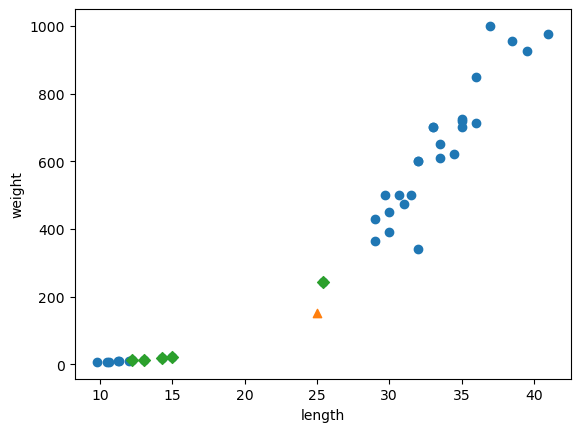

In [155]:
##매개변수를 삼각형으로 표기해서 산점도 그림
## tip- marker ='D'라고 지정하면 산점도를 마름모로 그림
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker ='D')
plt.xlabel('length') 
plt.ylabel('weight')
plt.show()

삼각형에 가장 가까운 5개 sample이 다이아몬드로 표시됨
가장 가까운 이웃에 도미는 1개고 나머지는 다 빙어임

In [156]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [157]:
##target_data로 확인하니 빙어4개 1개 도미
print(train_target[indexes])


[[1. 0. 0. 0. 0.]]


In [158]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


그래프랑 비교해 보면 점(마름모와 세모) 사이의 간격이 130, 90 이라고 하기엔 너무 보여지는 갭이 큼
x축과 y축 범위 차이가 매우 커서 나타나는 현상으로 보임

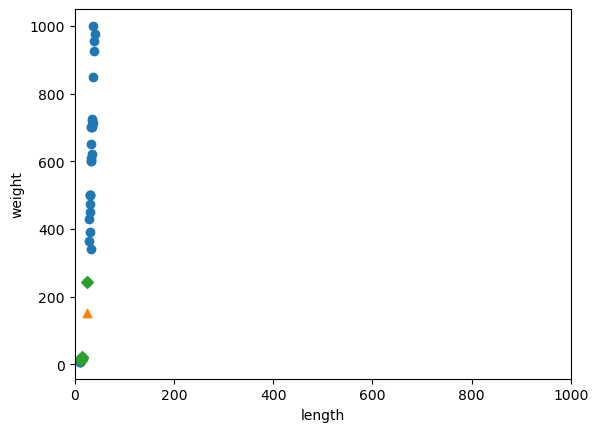

In [159]:
#x축 y축 맞춰줌, 근데 이럴때 무게 단위를 kg 단위로 해도 될 것 같은데 모르겠음
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker ='D')
plt.xlim(0,1000)
plt.xlabel('length') 
plt.ylabel('weight')
plt.show()

In [160]:
#두 특성의 값이 놓인 범위가 매우 다름. 스케일이 다름
#np.mean->평균, np.std-> 표준편차 계산.
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [161]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [164]:
#표준점수로 변환하기 위해 원본 데이터에서 평균을 빼고 표준편차로 나눔
train_scaled = (train_input - mean) / std 

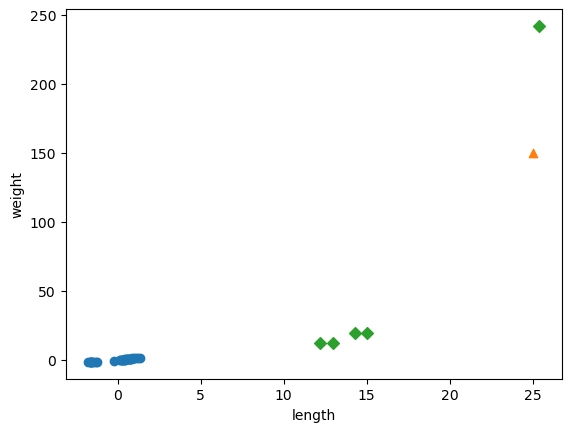

In [166]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^') # 25,150값 자체를 썼음
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker ='D')
plt.xlabel('length') 
plt.ylabel('weight')
plt.show()
#sample을 동일한 비율로 변환하지 않아서 점들이 아래로 몰림

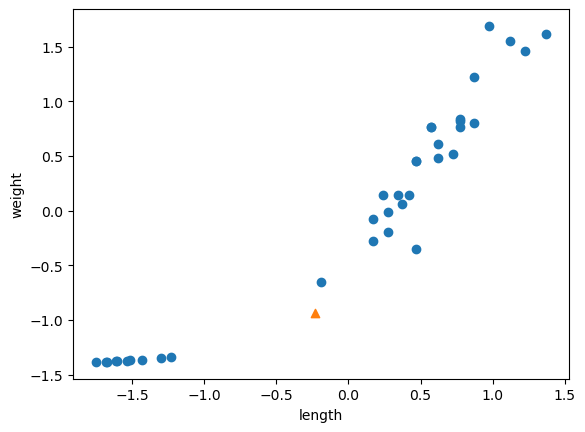

In [168]:
new = ([25,150] - mean) / std #값을 평균에서 빼고 표준편차로 나눔
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker ='^')
plt.xlabel('length') 
plt.ylabel('weight')
plt.show()
##x, y축 범위가 동일해짐!

In [169]:
kn.fit(train_scaled, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [170]:
test_scaled = (test_input - mean) / std

In [171]:
kn.score(test_scaled, test_target)
#정확도 1.0 나옴

1.0

In [172]:
#모델 예측
print(kn.predict([new]))

[1.]


앞에서 [25,150]을 빙어라고 예측했었는데
모델 다시 만든 후 도미라고 정확하게 예측함!

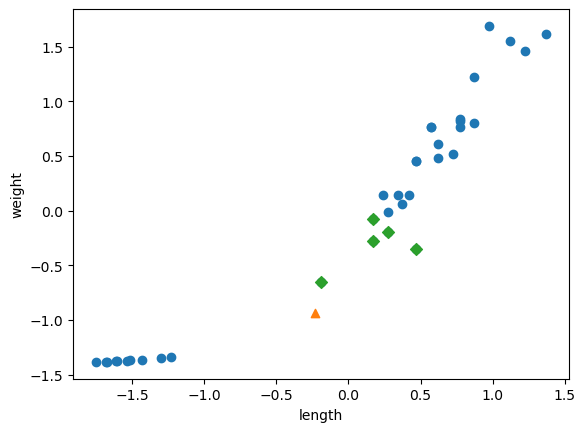

In [174]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker ='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker ='D')
plt.xlabel('length') 
plt.ylabel('weight')
plt.show()

x,y축 범위 맞춰놓으니 세모와 가장 가까운 샘플이 모두 도미라고 나옴
특성값의 스케일에 민감하지 않고 안정적인 예측을 할 수있는 모델을 만듬